In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!gdown 1lzmOPvwmzzWOfqLqK3gHPr4DFrKkyU34
!unzip dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1lzmOPvwmzzWOfqLqK3gHPr4DFrKkyU34
From (redirected): https://drive.google.com/uc?id=1lzmOPvwmzzWOfqLqK3gHPr4DFrKkyU34&confirm=t&uuid=e2bea287-a72d-4a3e-a213-544d7defd7f3
To: /kaggle/working/dataset.zip
100%|████████████████████████████████████████| 464M/464M [00:04<00:00, 97.5MB/s]
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/valid/
  inflating: __MACOSX/dataset/._valid  
   creating: dataset/test/
  inflating: __MACOSX/dataset/._test  
  inflating: dataset/data.yaml       
  inflating: __MACOSX/dataset/._data.yaml  
   creating: dataset/train/
  inflating: __MACOSX/dataset/._train  
   creating: dataset/valid/images/
  inflating: __MACOSX/dataset/valid/._images  
   creating: dataset/valid/labels/
  inflating: __MACOSX/dataset/valid/._labels  
   creating: dataset/test/images/
  inflating: __MACOSX/dataset/test/._images  
   creating: dataset/test/labels/
  inflating: __MACOSX/dataset/test/._labels  
  

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.

In [4]:
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# --- Bước 1: Load model pretrained YOLOv8n-seg
model = YOLO("yolov8n-seg.pt")  # Tải model nhẹ để fine-tune trên dataset của bạn

# --- Bước 2: Thiết lập các tham số huấn luyện
data_yaml = "/kaggle/working/dataset/data.yaml"          # File cấu hình dataset theo định dạng YOLO (hoặc COCO chuyển đổi)
epochs = 100                     # Số epoch tối đa (Early stopping sẽ dừng sớm nếu không cải thiện)
imgsz = 640                      # Kích thước ảnh đầu vào
batch_size = 64

100%|██████████| 6.74M/6.74M [00:00<00:00, 130MB/s]


In [6]:
results = model.train(
    data=data_yaml,
    batch=batch_size,
    epochs=epochs,
    imgsz=imgsz,
    copy_paste=0.3,
    copy_paste_mode='flip'
)

Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 116MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1655.2±680.6 MB/s, size: 66.7 KB)


train: Scanning /kaggle/working/dataset/train/labels... 5817 images, 44 backgrounds, 0 corrupt: 100%|██████████| 5817/5817 [00:05<00:00, 999.44it/s] 


train: New cache created: /kaggle/working/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 859.7±643.3 MB/s, size: 66.8 KB)


val: Scanning /kaggle/working/dataset/valid/labels... 238 images, 4 backgrounds, 0 corrupt: 100%|██████████| 238/238 [00:00<00:00, 999.63it/s]

val: New cache created: /kaggle/working/dataset/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.4G      1.577      2.713      2.809      1.303        804        640: 100%|██████████| 91/91 [01:48<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        238       2478      0.482      0.157      0.218      0.121      0.484      0.154      0.211     0.0993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.7G       1.38      2.006      1.756      1.153       1144        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        238       2478      0.369      0.342      0.277       0.15      0.352      0.326      0.253      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.6G      1.372      1.958      1.633      1.148       1135        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        238       2478      0.416      0.413      0.354        0.2      0.379      0.403      0.323      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.9G      1.355      1.929      1.538       1.14        963        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.409      0.473       0.39      0.225      0.398      0.465      0.371      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.4G      1.327      1.879      1.474      1.127        821        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        238       2478      0.515      0.457      0.421      0.248      0.504      0.445      0.413      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.6G      1.298      1.833      1.402      1.113        956        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.544      0.463      0.464      0.263      0.539      0.454      0.448      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.8G      1.286      1.801      1.377      1.103        935        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478      0.494      0.482      0.446      0.265       0.49      0.477      0.439      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.4G      1.263       1.76      1.327      1.094        946        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        238       2478      0.466      0.493      0.423      0.254      0.479       0.49      0.425      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.5G       1.24      1.732      1.285      1.083        817        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        238       2478      0.545       0.52      0.503      0.301      0.555      0.512      0.499       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.5G      1.237      1.735       1.28      1.082       1169        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.578      0.527      0.532      0.318      0.589       0.53      0.531      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.6G      1.226      1.696      1.246      1.075       1005        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.585      0.538      0.558      0.336      0.573      0.538       0.54      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.4G      1.215      1.684      1.229      1.073        992        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478      0.618      0.531      0.558      0.336      0.619      0.532      0.557      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.2G      1.207      1.668      1.203      1.064        971        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.576      0.506      0.516      0.313      0.581      0.501      0.508      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.4G      1.199      1.656      1.187      1.065        949        640: 100%|██████████| 91/91 [01:41<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        238       2478      0.541      0.543      0.501      0.306      0.542      0.544      0.501      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.3G      1.184      1.633      1.165      1.056        991        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        238       2478      0.615      0.529      0.573      0.351      0.633      0.519      0.568      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.4G      1.183      1.642      1.168      1.057        932        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478       0.58      0.538      0.527      0.324      0.591      0.533      0.521      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.9G      1.174      1.625      1.143       1.05       1089        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.589       0.53       0.53      0.327      0.588      0.535      0.532      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.6G      1.168       1.61       1.13      1.046       1050        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        238       2478      0.597      0.501      0.546       0.34      0.592        0.5      0.542      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.8G      1.161      1.588      1.112      1.044       1194        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.657      0.543      0.595      0.367       0.66      0.546      0.597       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.8G      1.159      1.588        1.1      1.043       1044        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.548      0.569      0.526      0.327      0.559      0.557      0.526      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.6G      1.156      1.574      1.088      1.037       1099        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.612      0.543      0.582      0.362      0.616      0.545      0.584      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.6G      1.143      1.572      1.076      1.036        895        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478       0.65      0.523      0.576      0.354      0.627      0.536      0.575      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.7G      1.144      1.564      1.072      1.034        959        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all        238       2478      0.613      0.559      0.569      0.353      0.612      0.567      0.569       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.2G       1.13      1.548      1.052       1.03        996        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.628       0.57      0.597      0.371      0.639      0.571        0.6      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.3G      1.132      1.541      1.049      1.028       1051        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        238       2478      0.616      0.592      0.601      0.376      0.618      0.589      0.592      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.6G      1.129       1.54      1.034      1.024       1245        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478      0.603      0.565      0.574      0.359      0.599      0.568      0.571      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.3G      1.124       1.54      1.028      1.025        929        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        238       2478      0.604      0.571      0.577      0.362      0.613      0.576      0.581      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G      1.116      1.525      1.009      1.019       1303        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        238       2478      0.605      0.567      0.575      0.358      0.594       0.56      0.563      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.9G      1.116      1.518      1.012      1.018        979        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.628      0.571      0.602      0.376      0.622      0.572      0.599      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.4G      1.105      1.503     0.9965      1.014        845        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.607      0.582      0.591      0.371       0.61       0.58       0.59       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.7G       1.11      1.506     0.9905      1.017        927        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        238       2478      0.615      0.562      0.595      0.374      0.621      0.566      0.597      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.5G      1.103      1.497     0.9793      1.011        912        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478       0.62      0.562      0.597       0.38       0.63      0.561        0.6      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.6G      1.093      1.483     0.9728       1.01       1115        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.616      0.561      0.587      0.367      0.617       0.56      0.581      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.1G      1.091      1.486     0.9612      1.011       1001        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.658      0.568      0.613      0.388      0.659      0.575      0.614      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.2G      1.088      1.471     0.9553      1.004       1109        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        238       2478      0.638      0.551      0.579       0.37      0.639      0.551      0.575      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.8G      1.083      1.472     0.9465      1.003       1202        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.618      0.598      0.598      0.381      0.627      0.586      0.597      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.7G      1.085      1.475     0.9441      1.004       1039        640: 100%|██████████| 91/91 [01:42<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.665      0.574      0.616      0.389      0.645      0.583      0.617      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.1G      1.076      1.459     0.9346          1       1033        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.634      0.576      0.603      0.382      0.635      0.578      0.602      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.5G      1.076       1.45     0.9274      1.001        890        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.619      0.578      0.602       0.38      0.611      0.574      0.596      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.5G       1.08      1.463     0.9276     0.9987       1071        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        238       2478      0.632      0.575      0.606      0.384      0.636      0.579      0.607      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.7G      1.075      1.448     0.9139     0.9984        925        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478       0.66      0.569      0.605       0.38      0.659       0.57        0.6      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.7G      1.064      1.433     0.9002     0.9925        962        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.636      0.562      0.589      0.376      0.638      0.569      0.592      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.1G      1.063      1.444     0.9062     0.9942        933        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.608      0.582      0.594      0.376       0.62       0.59      0.599      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100        12G       1.06      1.426       0.89     0.9886       1181        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478      0.666      0.569      0.602      0.379      0.663      0.571        0.6      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.5G      1.057      1.427     0.8914       0.99       1186        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.638      0.591      0.599      0.384      0.639      0.606      0.605      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.7G      1.054      1.424     0.8846     0.9897       1000        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        238       2478      0.634      0.576      0.593      0.378      0.632      0.582      0.592      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.3G      1.058      1.415     0.8892     0.9882        916        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        238       2478      0.662      0.576      0.612      0.392      0.668       0.58      0.613      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.5G      1.044      1.405     0.8648     0.9856        954        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        238       2478       0.64      0.568       0.59      0.372      0.641      0.569      0.584      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.6G      1.048      1.412     0.8672     0.9841        798        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478      0.673      0.586      0.619      0.395      0.679      0.576      0.614      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.1G      1.039      1.399     0.8664     0.9828       1321        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478      0.647       0.58      0.614      0.394      0.662      0.589      0.622      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.4G      1.042      1.402     0.8599     0.9816        926        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478       0.65      0.582      0.603      0.382      0.651      0.577      0.596       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.2G      1.034      1.393     0.8501     0.9793        941        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478       0.66      0.569      0.602      0.386      0.661      0.574      0.603      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100        11G      1.035      1.398     0.8472     0.9811        991        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.634        0.6      0.603      0.385      0.636      0.599      0.601      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.3G      1.025      1.379     0.8392      0.976       1048        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        238       2478      0.645      0.591       0.61      0.386      0.645      0.592      0.604      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G      1.029      1.387      0.838     0.9752        999        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478       0.67      0.573      0.607      0.385      0.671      0.579      0.611      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.6G      1.027      1.386     0.8326     0.9761        902        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        238       2478      0.659      0.567      0.607      0.385      0.675      0.562      0.609      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.8G      1.021      1.378     0.8324      0.976       1020        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.669      0.581      0.615      0.393      0.668      0.582      0.613      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.5G      1.015      1.359     0.8165     0.9711       1003        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all        238       2478      0.659      0.589      0.612      0.391       0.66      0.595      0.612      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.5G      1.022      1.371     0.8134     0.9732       1004        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478       0.64      0.597      0.611      0.393      0.642      0.597      0.607      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.9G      1.015      1.355     0.8069     0.9699        947        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        238       2478      0.651      0.596      0.625      0.399      0.663      0.591      0.626      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.7G      1.014      1.359     0.8081     0.9702       1132        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        238       2478      0.659      0.576      0.611      0.394      0.665      0.581      0.613      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.5G      1.012      1.358     0.8019     0.9663        778        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478      0.674      0.558      0.602      0.388      0.676       0.56      0.602      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.7G      1.006      1.349     0.8053     0.9674        859        640: 100%|██████████| 91/91 [01:41<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        238       2478      0.631      0.591      0.607      0.386      0.634      0.591      0.608      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.9G       1.01      1.356     0.8001      0.968       1027        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.649      0.586      0.612      0.394      0.656      0.589      0.614       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.4G      1.001      1.346     0.7924     0.9663       1161        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        238       2478      0.642      0.583      0.607      0.388      0.646      0.586      0.608      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.4G     0.9987      1.348     0.7925      0.965        920        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        238       2478      0.665      0.569       0.61      0.394       0.67      0.573      0.611      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100        11G      1.004       1.34     0.7894     0.9655       1007        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478       0.67      0.562      0.612      0.396      0.672      0.566      0.611      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.8G     0.9914      1.333     0.7772     0.9632        867        640: 100%|██████████| 91/91 [01:40<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        238       2478      0.663      0.574      0.609      0.387      0.664      0.575      0.608      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.5G     0.9996      1.339     0.7798     0.9627       1112        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        238       2478       0.63      0.603      0.611      0.391      0.632      0.606      0.615       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.8G     0.9955      1.341     0.7814     0.9633       1089        640: 100%|██████████| 91/91 [01:41<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.654      0.592      0.612       0.39      0.657      0.585       0.61      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.4G     0.9822       1.32     0.7609      0.958        989        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.657      0.588      0.607       0.39      0.658      0.596      0.611      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.4G      0.986      1.323     0.7643     0.9578       1107        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.676      0.562      0.604       0.39      0.679      0.564      0.608      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.6G     0.9753      1.314     0.7584     0.9579       1045        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478       0.65      0.585      0.607      0.395      0.636      0.596      0.608      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.9G     0.9776       1.32     0.7585     0.9589        776        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        238       2478      0.645      0.588       0.61      0.394      0.644      0.598      0.613      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.5G      0.979      1.313     0.7534     0.9545       1038        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        238       2478      0.645      0.588      0.604      0.389      0.652      0.593       0.61      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.3G     0.9736      1.311     0.7471     0.9545       1111        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.634       0.58      0.602      0.391      0.646      0.584      0.605      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.4G     0.9743      1.304     0.7476      0.953        960        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.669      0.574       0.61      0.392      0.677      0.576      0.612       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.9G     0.9684      1.301     0.7393     0.9521        995        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all        238       2478      0.637      0.595      0.605      0.388      0.657      0.584      0.607      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.4G     0.9691      1.303     0.7395     0.9535        978        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.659      0.577      0.611      0.393      0.663      0.579      0.614      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.4G     0.9676      1.301     0.7366     0.9526        902        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.674      0.575      0.611      0.393      0.686      0.575      0.613       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.6G     0.9712      1.308     0.7428     0.9544       1059        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.662      0.573      0.609      0.392      0.669      0.574       0.61      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.4G     0.9666      1.302     0.7344     0.9516        977        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.668      0.581      0.609      0.391      0.672      0.585      0.612      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.1G     0.9578      1.288     0.7291      0.949        970        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478      0.654      0.581      0.602      0.392      0.668      0.584      0.607      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.6G     0.9601      1.295     0.7303     0.9485        956        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.665      0.581       0.61      0.391      0.682      0.576      0.613      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.7G     0.9583      1.298     0.7252     0.9489       1068        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        238       2478      0.666       0.58      0.613      0.394      0.686      0.574      0.614      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.9557      1.278     0.7225     0.9479       1266        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all        238       2478      0.666      0.584      0.611      0.393      0.676      0.584      0.612      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.6G      0.951      1.282     0.7151     0.9457        906        640: 100%|██████████| 91/91 [01:47<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.654      0.595      0.611      0.391      0.669      0.592      0.615      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.8G     0.9494      1.277     0.7139     0.9439       1028        640: 100%|██████████| 91/91 [01:48<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all        238       2478       0.68      0.578      0.612      0.394      0.694      0.579      0.616      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.6G     0.9515      1.283      0.719     0.9457        980        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        238       2478      0.662      0.586      0.608      0.392      0.676      0.586      0.612      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.4G     0.9533      1.283     0.7183      0.944       1093        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.658      0.586      0.609      0.393      0.675      0.583      0.611      0.339


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.8G      1.013      1.346     0.7096     0.9695        610        640: 100%|██████████| 91/91 [01:32<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        238       2478      0.656      0.573      0.603      0.386      0.672      0.571      0.608      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.7G     0.9839      1.312     0.6506     0.9569        488        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        238       2478      0.656      0.582      0.602      0.386      0.663      0.581      0.605      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G     0.9793      1.306     0.6396     0.9521        426        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        238       2478      0.651      0.586      0.602      0.386      0.654      0.585      0.607      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100        11G     0.9774        1.3     0.6311     0.9513        484        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all        238       2478      0.659      0.577      0.604      0.388       0.66      0.575       0.61      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.5G     0.9727      1.298     0.6367     0.9513        547        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        238       2478      0.684      0.556      0.604      0.386      0.694      0.558       0.61      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.4G     0.9687       1.29     0.6256     0.9499        576        640: 100%|██████████| 91/91 [01:28<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        238       2478      0.647      0.583      0.603      0.386      0.659      0.587       0.61      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.2G     0.9649      1.282     0.6195     0.9486        504        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        238       2478      0.659      0.578      0.603      0.387      0.666      0.585      0.609      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.6G     0.9583      1.279     0.6129     0.9455        481        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        238       2478      0.675      0.564      0.602      0.387      0.683      0.572      0.609      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.6G     0.9548      1.264     0.6042     0.9447        489        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        238       2478      0.677      0.564      0.604      0.389      0.683      0.572       0.61      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.2G     0.9549      1.278     0.6117     0.9456        520        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        238       2478      0.639      0.592      0.604      0.387      0.667      0.583      0.611      0.341



100 epochs completed in 2.956 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:02<00:02,  2.05s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]


                   all        238       2478      0.651      0.596      0.625      0.399      0.662      0.591      0.626      0.346
   grain discoloration         45        174      0.699      0.681      0.691      0.437      0.713      0.678      0.707      0.392
           leaf blight        174        778      0.645      0.497      0.553       0.39      0.668      0.501      0.554      0.326
     pesticide residue         37        727       0.59      0.645      0.622      0.432       0.61      0.655       0.64      0.395
            rice blast        152        799       0.67      0.562      0.634      0.336      0.658      0.531      0.602      0.269


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/train


In [7]:
%%!
zip -r train.zip /kaggle/working/runs/segment/train

['  adding: kaggle/working/runs/segment/train/ (stored 0%)',
 '  adding: kaggle/working/runs/segment/train/labels_correlogram.jpg (deflated 25%)',
 '  adding: kaggle/working/runs/segment/train/BoxR_curve.png (deflated 10%)',
 '  adding: kaggle/working/runs/segment/train/train_batch1.jpg (deflated 1%)',
 '  adding: kaggle/working/runs/segment/train/args.yaml (deflated 53%)',
 '  adding: kaggle/working/runs/segment/train/MaskF1_curve.png (deflated 10%)',
 '  adding: kaggle/working/runs/segment/train/val_batch0_pred.jpg (deflated 4%)',
 '  adding: kaggle/working/runs/segment/train/BoxP_curve.png (deflated 8%)',
 '  adding: kaggle/working/runs/segment/train/train_batch8192.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train/val_batch1_labels.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train/train_batch8191.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train/val_batch1_pred.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train/BoxPR_cu

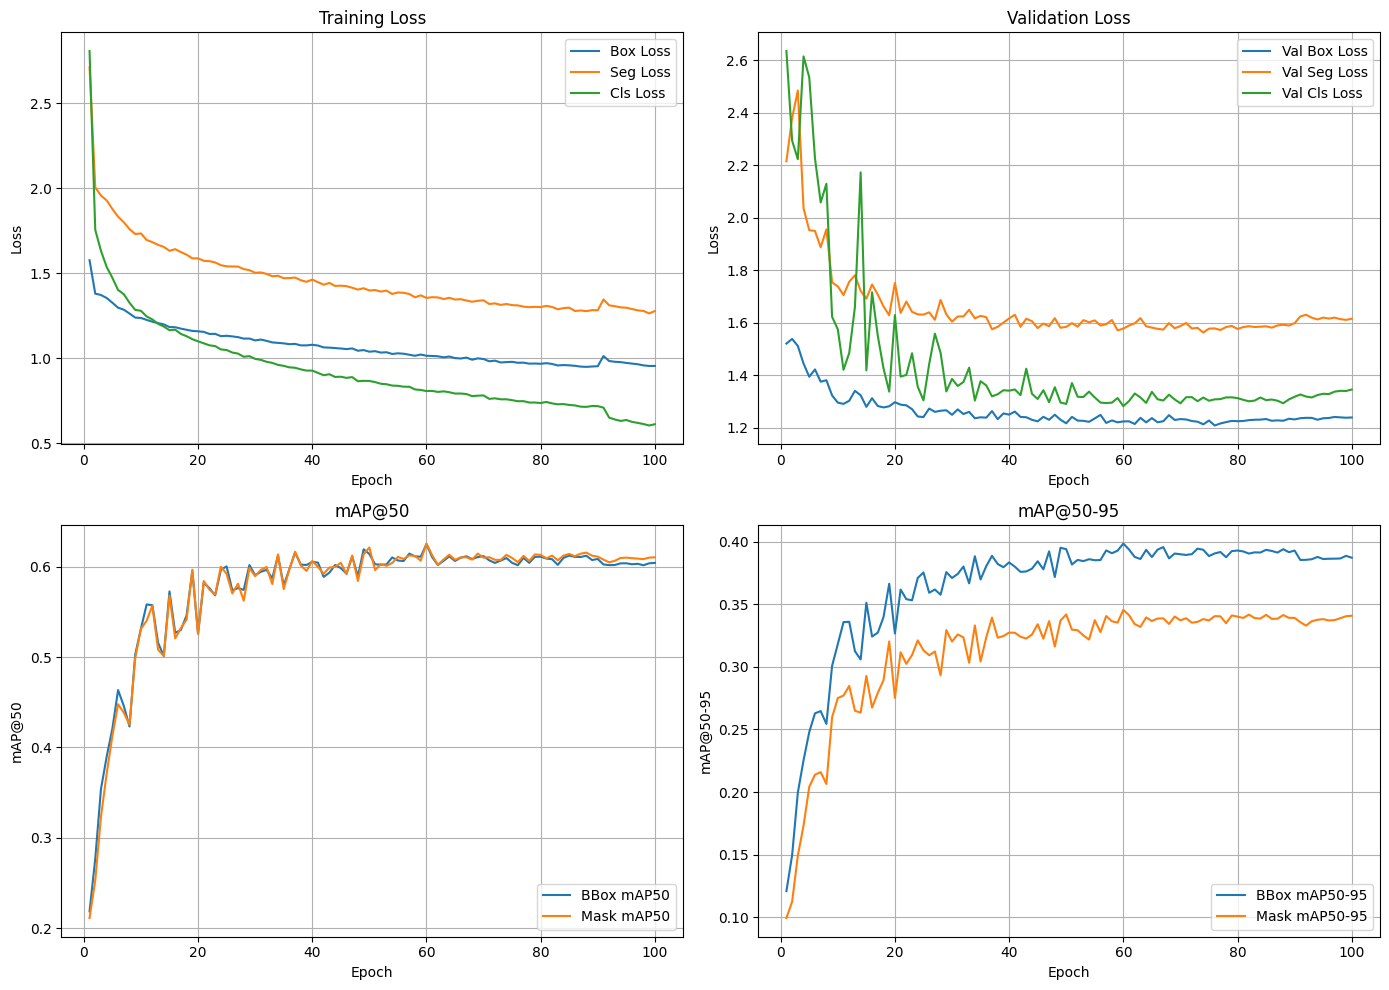

In [8]:
import pandas as pd

# Load lại file sau khi reset
file_path = "/kaggle/working/runs/segment/train/results.csv"
df = pd.read_csv(file_path)

import matplotlib.pyplot as plt

# Vẽ biểu đồ loss và mAP để đánh giá quá trình train
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Training Loss ---
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label='Box Loss')
axes[0, 0].plot(df['epoch'], df['train/seg_loss'], label='Seg Loss')
axes[0, 0].plot(df['epoch'], df['train/cls_loss'], label='Cls Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# --- Validation Loss ---
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0, 1].plot(df['epoch'], df['val/seg_loss'], label='Val Seg Loss')
axes[0, 1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- mAP50 ---
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='BBox mAP50')
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(M)'], label='Mask mAP50')
axes[1, 0].set_title('mAP@50')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('mAP@50')
axes[1, 0].legend()
axes[1, 0].grid(True)

# --- mAP50-95 ---
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='BBox mAP50-95')
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(M)'], label='Mask mAP50-95')
axes[1, 1].set_title('mAP@50-95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('mAP@50-95')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
import os

# Remove the file
os.remove('/kaggle/working/yolov8n-seg.pt') 

# Verify if the file has been removed
if not os.path.exists('/kaggle/working/yolov8n-seg.pt'):
  print("File 'yolov8n-seg.pt' has been successfully removed.")
else:
  print("Failed to remove the file.")

File 'yolov8n-seg.pt' has been successfully removed.


In [10]:
class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts

        # Aggregation function
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()
    
    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
              weights.append(1)
              continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))

In [11]:
import ultralytics.data.build as build

build.YOLODataset = YOLOWeightedDataset

In [12]:
# --- Bước 1: Load model pretrained YOLOv8n-seg
model = YOLO("yolov8n-seg.pt")  # Tải model nhẹ để fine-tune trên dataset của bạn

# --- Bước 2: Thiết lập các tham số huấn luyện
data_yaml = "/kaggle/working/dataset/data.yaml"          # File cấu hình dataset theo định dạng YOLO (hoặc COCO chuyển đổi)
epochs = 100                     # Số epoch tối đa (Early stopping sẽ dừng sớm nếu không cải thiện)
imgsz = 640                      # Kích thước ảnh đầu vào
batch_size = 64

100%|██████████| 6.74M/6.74M [00:00<00:00, 110MB/s]


In [13]:
results = model.train(
    data=data_yaml,
    batch=batch_size,
    epochs=epochs,
    imgsz=imgsz,
    copy_paste=0.3,
    copy_paste_mode='flip'
)

Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

train: Scanning /kaggle/working/dataset/train/labels.cache... 5817 images, 44 backgrounds, 0 corrupt: 100%|██████████| 5817/5817 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 532.8±385.2 MB/s, size: 66.8 KB)


val: Scanning /kaggle/working/dataset/valid/labels.cache... 238 images, 4 backgrounds, 0 corrupt: 100%|██████████| 238/238 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.9G      1.568      2.723      2.816      1.299        991        640: 100%|██████████| 91/91 [01:55<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        238       2478      0.508      0.223      0.218      0.129      0.503      0.215      0.215      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.4G      1.361      2.025      1.747      1.148        961        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.366      0.398      0.307      0.172      0.363      0.385      0.295      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.3G      1.366      1.981      1.626      1.149        892        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        238       2478      0.435      0.414      0.365      0.201      0.423      0.401      0.339      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.4G       1.35      1.933       1.53      1.138        903        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        238       2478      0.491      0.418      0.406       0.23      0.523      0.406      0.414      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.5G      1.314      1.884      1.449      1.122        988        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        238       2478      0.426      0.461      0.395      0.237      0.433      0.468      0.401      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.4G      1.289      1.821      1.385      1.114        912        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478      0.509       0.49      0.462      0.268      0.511      0.508      0.467       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.4G      1.281      1.808      1.343      1.102       1187        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        238       2478      0.513      0.519      0.503      0.293      0.509      0.511      0.488      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.4G      1.252      1.759      1.298      1.088        941        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        238       2478       0.54      0.476      0.463      0.268      0.531      0.474      0.449      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.5G      1.231      1.733      1.262      1.078        824        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478      0.558      0.535      0.529      0.315       0.57      0.518      0.521      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.5G      1.227      1.725       1.25      1.081       1307        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.549      0.558      0.531       0.31       0.55      0.558      0.525      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.8G      1.204       1.69      1.215      1.073       1002        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        238       2478      0.532      0.484      0.497      0.298      0.543      0.491      0.501      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100        12G      1.196      1.677      1.187      1.069       1109        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        238       2478      0.588      0.555       0.56      0.345      0.595      0.544       0.56      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.9G      1.188      1.651      1.172      1.066        923        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        238       2478      0.528      0.524      0.514      0.313      0.541      0.495      0.503       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G      1.179      1.634      1.159      1.056        866        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478      0.531      0.558      0.518      0.307      0.547      0.559      0.523      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.8G      1.167      1.617      1.122      1.052       1024        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        238       2478      0.549      0.559      0.544      0.334      0.542      0.551      0.528      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.6G      1.169      1.627      1.124      1.052       1085        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        238       2478      0.536      0.582      0.557      0.341      0.538      0.559      0.543      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.4G      1.167      1.613      1.117      1.046        894        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        238       2478      0.526      0.548      0.522      0.322       0.52      0.543      0.516      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.7G      1.156      1.594      1.098      1.044        965        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478      0.607       0.55       0.57      0.345       0.61       0.55      0.564      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G      1.144      1.579      1.081       1.04        991        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.583      0.572      0.581      0.355       0.59      0.577      0.587      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.4G      1.134      1.557      1.059      1.033       1267        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.585      0.579      0.574      0.356      0.584       0.58      0.567      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.5G      1.136      1.561      1.057      1.034        878        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        238       2478       0.58      0.587      0.572      0.357      0.574      0.581      0.557      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.7G      1.133      1.555      1.046      1.034        950        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.595      0.558      0.571      0.356      0.598      0.563      0.568      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.5G      1.121      1.543      1.033      1.033        938        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        238       2478      0.567      0.551      0.549      0.343      0.562       0.56      0.547      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      1.125       1.54      1.028      1.027       1141        640: 100%|██████████| 91/91 [01:46<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        238       2478      0.577      0.565      0.565      0.348      0.587      0.553      0.561      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.9G      1.111      1.521      1.008      1.023        852        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.592      0.556      0.575      0.355      0.595      0.557      0.568      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.5G      1.116      1.525     0.9993       1.02       1128        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.596      0.566      0.565      0.352      0.605      0.566      0.565      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.1G      1.107      1.528     0.9954      1.021       1027        640: 100%|██████████| 91/91 [01:48<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        238       2478      0.609      0.585        0.6      0.375      0.613      0.586      0.599      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G      1.109      1.506     0.9957      1.019       1226        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        238       2478      0.626      0.577      0.592      0.369      0.626       0.58      0.596      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.7G      1.095      1.496     0.9729      1.015        964        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        238       2478       0.58      0.616      0.595      0.373      0.594      0.606      0.594      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.7G      1.086       1.48     0.9601      1.012        830        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        238       2478      0.612      0.581      0.588      0.368      0.616      0.574      0.582      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.2G      1.089       1.47     0.9533      1.012        977        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478      0.619      0.574      0.596      0.375      0.638       0.57      0.598       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.3G      1.076      1.467     0.9404      1.003        918        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478       0.61      0.553      0.582       0.36      0.616      0.554      0.578      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.5G      1.074      1.465      0.943      1.004       1121        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.615       0.58      0.606       0.38      0.624      0.579      0.605      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.6G      1.077      1.475     0.9383      1.006       1098        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478      0.636      0.577      0.602      0.379      0.635      0.574      0.593      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.6G      1.076      1.469     0.9401      1.005       1132        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        238       2478      0.613      0.579      0.597       0.38      0.615      0.581      0.596      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100        11G      1.069      1.462     0.9222      1.003       1074        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478      0.613      0.579       0.59      0.372       0.61      0.576       0.58      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.7G      1.077      1.463     0.9261      1.002        947        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all        238       2478      0.613       0.59      0.598      0.375      0.611      0.591      0.595       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.9G       1.06       1.44     0.9103          1       1157        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        238       2478      0.647      0.565      0.596      0.371      0.652      0.577      0.604      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.1G      1.058      1.445     0.9011     0.9952        972        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.627      0.577      0.601      0.375      0.634      0.568      0.594      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.9G      1.058      1.438      0.906     0.9943        887        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all        238       2478      0.632      0.589      0.603      0.379      0.637      0.591      0.603      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.8G      1.056      1.428     0.8949      0.994        936        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.615      0.614      0.608      0.381      0.613      0.615      0.603      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G      1.038      1.408     0.8742     0.9895        905        640: 100%|██████████| 91/91 [01:47<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        238       2478       0.63      0.587      0.605      0.386      0.643      0.573      0.601      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.8G      1.041      1.412     0.8794     0.9915       1014        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.632      0.594       0.61      0.376      0.629      0.593      0.602      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.3G      1.036      1.407     0.8689     0.9872        856        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.642      0.572       0.62      0.392      0.657      0.574      0.618      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.6G      1.035        1.4     0.8669     0.9869       1079        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        238       2478      0.608      0.608      0.596      0.375      0.618        0.6      0.596      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.8G      1.034      1.402     0.8596     0.9854       1097        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.634      0.601      0.607      0.388      0.651      0.585      0.602      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.5G      1.035      1.406     0.8591      0.986        767        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        238       2478      0.648      0.577      0.599      0.381       0.67      0.572      0.601      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.7G      1.026      1.388     0.8452     0.9829        957        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        238       2478       0.61      0.578      0.589      0.373      0.625      0.576      0.587      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.9G      1.029      1.394     0.8457     0.9836        810        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.617      0.596      0.603      0.382      0.633      0.584      0.599      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.6G      1.028      1.394     0.8497     0.9811       1051        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.625      0.603      0.617       0.39      0.634      0.605      0.619      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.7G      1.028      1.394     0.8418     0.9798       1009        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        238       2478      0.619      0.604      0.609      0.385      0.633      0.606      0.611      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.6G      1.024      1.391     0.8319     0.9811        877        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        238       2478      0.654      0.585       0.62      0.393      0.658       0.59      0.618      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.3G      1.014      1.362       0.82     0.9759        956        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.628        0.6      0.619      0.391      0.632      0.605      0.617      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.6G      1.008      1.359     0.8137     0.9722        863        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        238       2478      0.668      0.599      0.627      0.399      0.667      0.597      0.624      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.8G      1.013      1.375      0.819     0.9733       1041        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        238       2478       0.65      0.584      0.621      0.398      0.652      0.586       0.62       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.7G      1.014      1.372     0.8124     0.9729       1129        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        238       2478      0.663      0.588      0.621      0.394      0.673      0.582      0.617      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.5G      1.008       1.36     0.8086     0.9727        986        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.638      0.593      0.614       0.39      0.643      0.591      0.609      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.5G     0.9948      1.344     0.7989      0.969        836        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.653      0.581      0.619      0.395      0.659      0.585      0.617      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.2G     0.9967      1.342     0.7962     0.9715       1064        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        238       2478      0.633      0.585      0.605      0.384      0.635      0.586        0.6      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.7G     0.9949      1.337     0.7996     0.9688        862        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.644        0.6      0.608       0.39      0.647      0.605      0.613      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.2G          1      1.357     0.7947     0.9685       1298        640: 100%|██████████| 91/91 [01:45<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        238       2478      0.642      0.598      0.616      0.397      0.659      0.601      0.621      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.6G     0.9979      1.351     0.7886     0.9694        971        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.622      0.609      0.615      0.394      0.645       0.59      0.611      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.6G     0.9958      1.344     0.7882     0.9637        893        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        238       2478       0.66      0.589      0.624        0.4      0.664      0.592      0.624      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.6G     0.9857      1.333     0.7839     0.9632        970        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        238       2478      0.631      0.603       0.62        0.4      0.642      0.608      0.628      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.4G     0.9757      1.315     0.7613     0.9622       1148        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.646      0.585      0.613      0.392      0.661      0.596      0.622       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.2G     0.9815      1.334     0.7726     0.9626       1063        640: 100%|██████████| 91/91 [01:46<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.645      0.587      0.619      0.395      0.667      0.587      0.621      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.6G     0.9815      1.334     0.7707     0.9626       1098        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        238       2478      0.647      0.583      0.616      0.395      0.665      0.583      0.617      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.9G     0.9747       1.32     0.7681     0.9616        847        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        238       2478      0.641      0.606      0.622      0.399      0.661        0.6      0.628      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100        11G     0.9655      1.301     0.7551     0.9578       1050        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        238       2478      0.652      0.583      0.622      0.394      0.654      0.605      0.627       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.6G     0.9743      1.322     0.7658      0.961        992        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all        238       2478      0.672      0.585      0.626      0.399      0.671      0.597      0.626      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.5G     0.9746      1.315     0.7527     0.9569       1059        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        238       2478      0.643       0.61      0.625      0.396      0.641      0.615       0.62      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.7G     0.9688      1.307     0.7497     0.9546        950        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478      0.654      0.597      0.622      0.398      0.666      0.596      0.619      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100        11G     0.9619        1.3     0.7425     0.9551        966        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        238       2478      0.659      0.596      0.618      0.395      0.662      0.608      0.624      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.6G     0.9625      1.308     0.7423     0.9544       1062        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        238       2478      0.679      0.579      0.617      0.394      0.686      0.586       0.62      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.4G     0.9583      1.293     0.7358     0.9534        924        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.665      0.589      0.619      0.398      0.673      0.599      0.622      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.3G     0.9529      1.288     0.7318     0.9507        858        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all        238       2478      0.675      0.587      0.628      0.402      0.686      0.594      0.632      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.5G     0.9566      1.291      0.728     0.9512       1166        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.632      0.612      0.617      0.396       0.64      0.619      0.621      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.5G     0.9558      1.293     0.7296     0.9506        893        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all        238       2478      0.667      0.586      0.622      0.398      0.683       0.59      0.625       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.8G     0.9536      1.286     0.7282     0.9511        956        640: 100%|██████████| 91/91 [01:43<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        238       2478      0.673      0.571      0.623      0.398       0.68      0.575      0.623      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.1G     0.9573      1.302     0.7294     0.9514        999        640: 100%|██████████| 91/91 [01:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        238       2478      0.666      0.587      0.627        0.4      0.665      0.587      0.624      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.7G     0.9496      1.285     0.7231     0.9494       1161        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        238       2478      0.634      0.607      0.626        0.4      0.638       0.61      0.625       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.6G      0.937      1.276     0.7191     0.9469       1068        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.642      0.607      0.624      0.398      0.646      0.611      0.621      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.6G     0.9473      1.281      0.718     0.9475        892        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        238       2478       0.67      0.586      0.621      0.398      0.677      0.585      0.618      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100        11G     0.9481      1.278     0.7211     0.9489        859        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        238       2478      0.684      0.588      0.624      0.399      0.689      0.594      0.626      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.6G     0.9299      1.263     0.7054     0.9433        965        640: 100%|██████████| 91/91 [01:42<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.675      0.577      0.622      0.399      0.675       0.58      0.619      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.2G     0.9383      1.271     0.7065      0.944        901        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all        238       2478      0.638      0.601      0.622      0.398      0.642      0.605      0.623      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.7G     0.9418      1.278     0.7128     0.9451       1043        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        238       2478      0.654      0.597      0.622        0.4      0.662        0.6      0.625      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.7G     0.9355      1.259     0.7027     0.9436       1033        640: 100%|██████████| 91/91 [01:44<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        238       2478      0.652      0.596      0.624      0.403      0.687      0.576      0.621      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100        12G     0.9306      1.263     0.7009     0.9431        955        640: 100%|██████████| 91/91 [01:44<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all        238       2478      0.675       0.59      0.625      0.402      0.682      0.591      0.624      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.5G     0.9246      1.261      0.692     0.9428        976        640: 100%|██████████| 91/91 [01:43<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        238       2478      0.665      0.587      0.624      0.401      0.676      0.589      0.626      0.342


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G     0.9852      1.324     0.6906     0.9649        474        640: 100%|██████████| 91/91 [01:32<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        238       2478      0.667       0.59      0.621      0.397      0.672      0.589       0.62      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.7G     0.9565       1.28     0.6346       0.95        438        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all        238       2478      0.655      0.607      0.624      0.399      0.672      0.596      0.622      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G     0.9375      1.258     0.6176     0.9482        543        640: 100%|██████████| 91/91 [01:26<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        238       2478      0.673      0.589      0.624      0.398      0.682       0.59      0.623      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.2G     0.9438       1.27     0.6209     0.9453        498        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        238       2478      0.663      0.597      0.626      0.401      0.673      0.593      0.623      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.7G     0.9453      1.275     0.6199     0.9474        485        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        238       2478      0.684       0.58      0.626      0.402      0.689      0.586      0.628      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.4G     0.9338      1.251     0.6041     0.9412        581        640: 100%|██████████| 91/91 [01:28<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        238       2478      0.688      0.584      0.627      0.403      0.693      0.588      0.628      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.2G      0.938      1.262      0.608     0.9424        575        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        238       2478      0.678      0.588      0.628      0.403      0.688      0.588      0.629      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.8G      0.924      1.241     0.5975     0.9407        596        640: 100%|██████████| 91/91 [01:27<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all        238       2478      0.685      0.588       0.63      0.405      0.689      0.591      0.629      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.4G     0.9248      1.246     0.5898     0.9384        475        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        238       2478      0.683       0.59       0.63      0.404      0.686      0.594      0.627      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.8G     0.9249      1.253      0.596     0.9381        527        640: 100%|██████████| 91/91 [01:27<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        238       2478      0.673      0.595      0.626      0.403      0.691      0.593      0.626      0.345



100 epochs completed in 2.981 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:02<00:02,  2.02s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]


                   all        238       2478      0.675      0.587      0.628      0.402      0.689      0.593      0.632      0.348
   grain discoloration         45        174       0.75      0.649      0.717      0.454       0.77      0.667      0.726       0.41
           leaf blight        174        778      0.643      0.523      0.562      0.401      0.666      0.536      0.566      0.323
     pesticide residue         37        727      0.585      0.647      0.605      0.422      0.595      0.651      0.623      0.389
            rice blast        152        799      0.722       0.53       0.63       0.33      0.727      0.519      0.614      0.269


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/train2


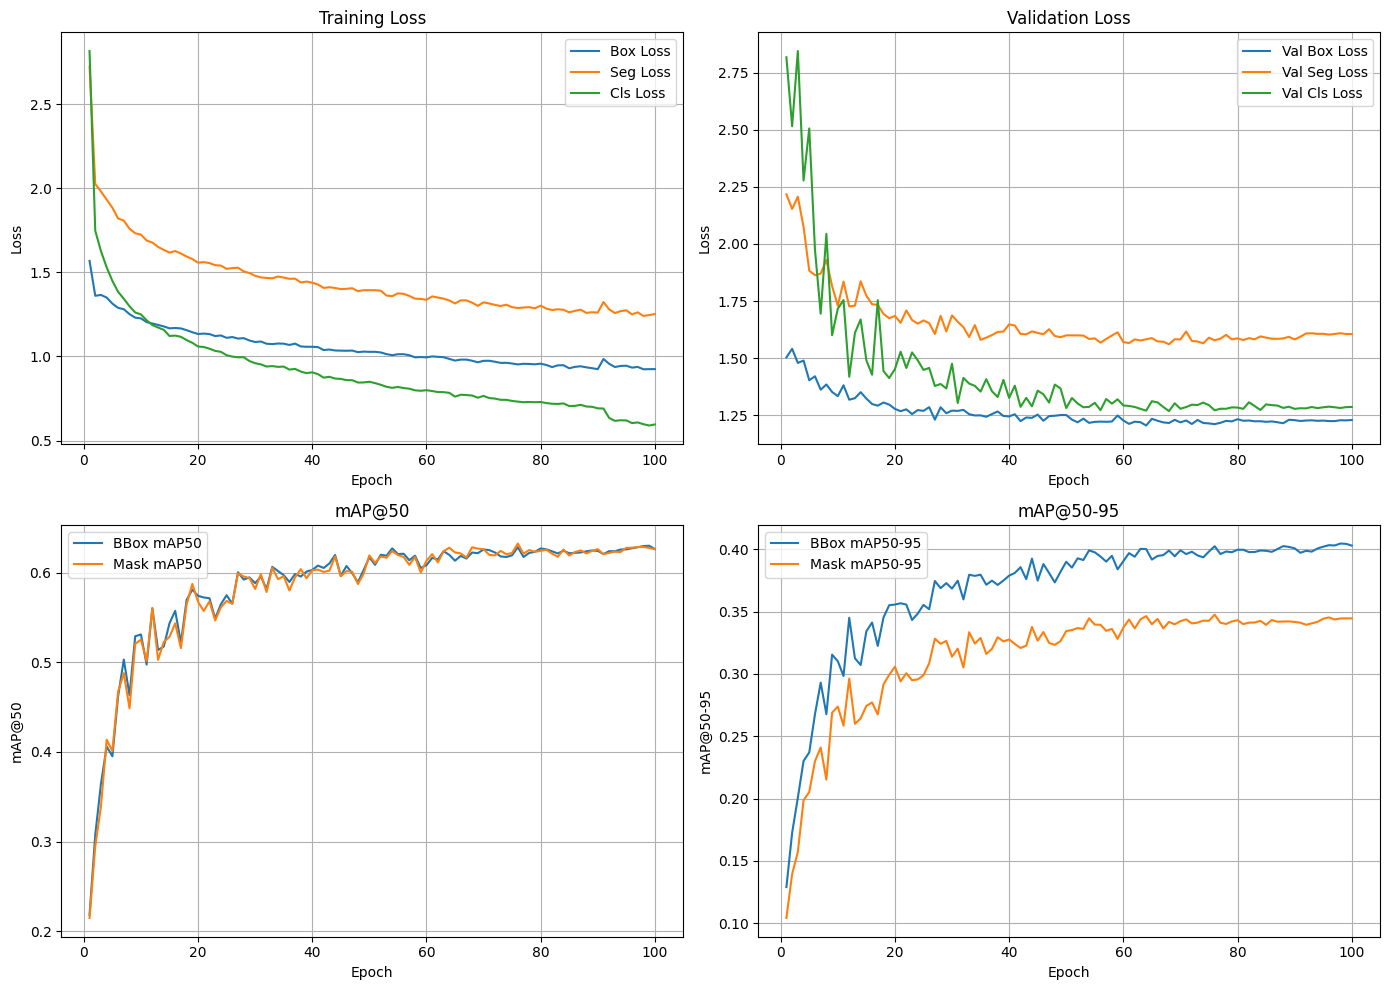

In [14]:
import pandas as pd

# Load lại file sau khi reset
file_path = "/kaggle/working/runs/segment/train2/results.csv"
df = pd.read_csv(file_path)

import matplotlib.pyplot as plt

# Vẽ biểu đồ loss và mAP để đánh giá quá trình train
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Training Loss ---
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label='Box Loss')
axes[0, 0].plot(df['epoch'], df['train/seg_loss'], label='Seg Loss')
axes[0, 0].plot(df['epoch'], df['train/cls_loss'], label='Cls Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# --- Validation Loss ---
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0, 1].plot(df['epoch'], df['val/seg_loss'], label='Val Seg Loss')
axes[0, 1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- mAP50 ---
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='BBox mAP50')
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(M)'], label='Mask mAP50')
axes[1, 0].set_title('mAP@50')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('mAP@50')
axes[1, 0].legend()
axes[1, 0].grid(True)

# --- mAP50-95 ---
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='BBox mAP50-95')
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(M)'], label='Mask mAP50-95')
axes[1, 1].set_title('mAP@50-95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('mAP@50-95')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [15]:
%%!
zip -r train_weight_dataloader.zip /kaggle/working/runs/segment/train2

['  adding: kaggle/working/runs/segment/train2/ (stored 0%)',
 '  adding: kaggle/working/runs/segment/train2/labels_correlogram.jpg (deflated 25%)',
 '  adding: kaggle/working/runs/segment/train2/BoxR_curve.png (deflated 10%)',
 '  adding: kaggle/working/runs/segment/train2/train_batch1.jpg (deflated 1%)',
 '  adding: kaggle/working/runs/segment/train2/args.yaml (deflated 53%)',
 '  adding: kaggle/working/runs/segment/train2/MaskF1_curve.png (deflated 10%)',
 '  adding: kaggle/working/runs/segment/train2/val_batch0_pred.jpg (deflated 4%)',
 '  adding: kaggle/working/runs/segment/train2/BoxP_curve.png (deflated 8%)',
 '  adding: kaggle/working/runs/segment/train2/train_batch8192.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train2/val_batch1_labels.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train2/train_batch8191.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/train2/val_batch1_pred.jpg (deflated 3%)',
 '  adding: kaggle/working/runs/segment/tr

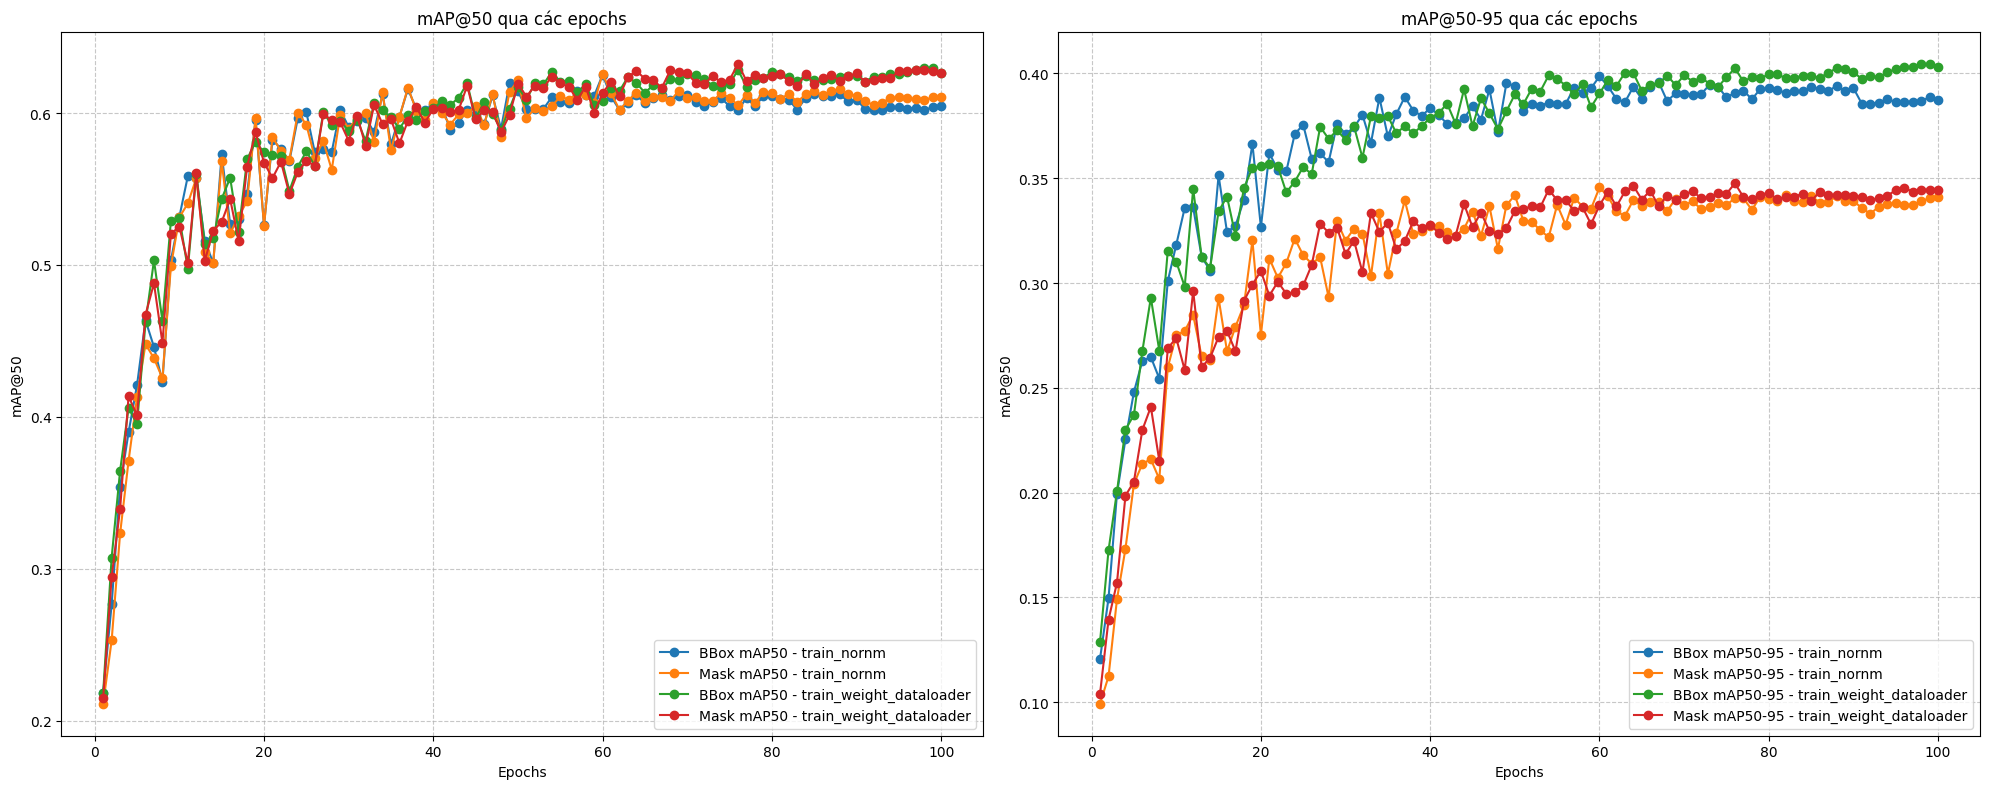

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Vẽ biểu đồ đường với 4 cột dữ liệu từ file CSV.

pd_dataset1 = pd.read_csv('/kaggle/working/runs/segment/train/results.csv')
pd_dataset2 = pd.read_csv('/kaggle/working/runs/segment/train2/results.csv')

axes[0].plot(pd_dataset1["epoch"], pd_dataset1["metrics/mAP50(B)"], label="BBox mAP50 - train_nornm", marker='o')
axes[0].plot(pd_dataset1["epoch"], pd_dataset1["metrics/mAP50(M)"], label="Mask mAP50 - train_nornm", marker='o')
axes[0].plot(pd_dataset2["epoch"], pd_dataset2["metrics/mAP50(B)"], label="BBox mAP50 - train_weight_dataloader", marker='o')
axes[0].plot(pd_dataset2["epoch"], pd_dataset2["metrics/mAP50(M)"], label="Mask mAP50 - train_weight_dataloader", marker='o')

axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("mAP@50")
axes[0].set_title("mAP@50 qua các epochs")
axes[0].legend()                      # Hiển thị chú thích cho từng đường
axes[0].grid(True, linestyle='--', alpha=0.7)  # Hiển thị lưới với độ mờ và kiểu đường
fig.tight_layout()                # Điều chỉnh layout để biểu đồ không bị cắt



axes[1].plot(pd_dataset1["epoch"], pd_dataset1["metrics/mAP50-95(B)"], label="BBox mAP50-95 - train_nornm", marker='o')
axes[1].plot(pd_dataset1["epoch"], pd_dataset1["metrics/mAP50-95(M)"], label="Mask mAP50-95 - train_nornm", marker='o')
axes[1].plot(pd_dataset2["epoch"], pd_dataset2["metrics/mAP50-95(B)"], label="BBox mAP50-95 - train_weight_dataloader", marker='o')
axes[1].plot(pd_dataset2["epoch"], pd_dataset2["metrics/mAP50-95(M)"], label="Mask mAP50-95 - train_weight_dataloader", marker='o')

axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("mAP@50")
axes[1].set_title("mAP@50-95 qua các epochs")
axes[1].legend()                      # Hiển thị chú thích cho từng đường
axes[1].grid(True, linestyle='--', alpha=0.7)  # Hiển thị lưới với độ mờ và kiểu đường
fig.tight_layout()                # Điều chỉnh layout để biểu đồ không bị cắt


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def verify_class_balance(dataset, num_samples=1000):
    """
    Verifies whether the __getitem__ method in the YOLOWeightedDataset class returns a balanced class output.

    Args:
        dataset: An instance of YOLOWeightedDataset.
        num_samples: Number of samples to draw from the dataset.

    Returns:
        class_counts: A dictionary containing the class counts.
    """
    all_labels = []
    num_samples = min(len(dataset.labels), num_samples)

    if dataset.train_mode:
        choices = np.random.choice(len(dataset.labels), size=num_samples, p=dataset.probabilities)
    else:
        choices = np.random.choice(len(dataset.labels), size=num_samples, replace=False)

    for i in choices:
        label = dataset.labels[i]["cls"]
        all_labels.extend(label.reshape(-1).astype(int))

    class_counts = Counter(all_labels)
    return class_counts

def plot_class_balance(weighted_cnts, unweighted_cnts, class_names):
    """
    Plots the comparison of class distribution between training and validation modes.

    Args:
        weighted_cnts: A dictionary containing the class counts in weighted mode.
        unweighted_cnts: A dictionary containing the class counts in unweighted mode.
        class_names: A list of class names.
    """
    classes = range(len(class_names))
    weighted_values = [weighted_cnts.get(c, 0) for c in classes]
    unweighted_values = [unweighted_cnts.get(c, 0) for c in classes]

    width = 0.35  # Bar width

    fig, ax = plt.subplots()
    ax.bar(classes, unweighted_values, width, label='Normal mode')
    ax.bar([c + width for c in classes], weighted_values, width, label='Weighted Mode')

    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title('Class Distribution in Normal vs Weighted Modes')
    ax.set_xticks([c + width / 2 for c in classes])
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.legend()

    plt.show()

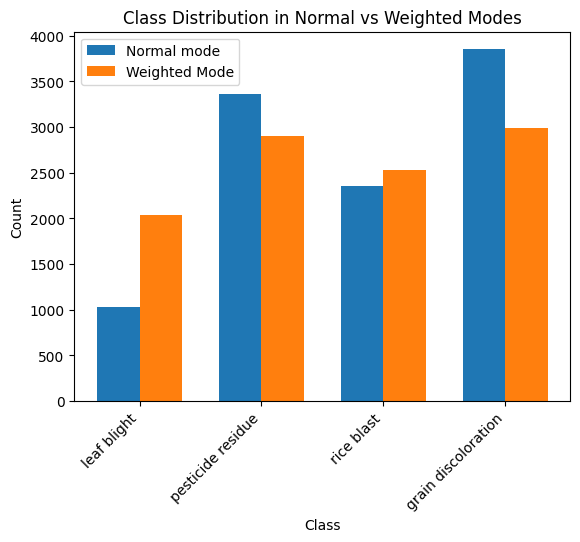

In [18]:
# You can test different aggregation functions np.max, np.sum, np.median, np.mean
model.trainer.train_loader.dataset.agg_func = np.mean
model.trainer.train_loader.dataset.weights = model.trainer.train_loader.dataset.calculate_weights()
model.trainer.train_loader.dataset.probabilities = model.trainer.train_loader.dataset.calculate_probabilities()

# Get class counts in weighted mode
model.trainer.train_loader.dataset.train_mode = True
weighted_counts = verify_class_balance(model.trainer.train_loader.dataset, num_samples=1000)

# Get class counts in default mode
model.trainer.train_loader.dataset.train_mode = False
default_counts = verify_class_balance(model.trainer.train_loader.dataset, num_samples=1000)

# Plot the comparison
plot_class_balance(weighted_counts, default_counts, set(model.trainer.train_loader.dataset.data["names"].values()))